## Basic

In [1]:
import tensorflow as tf

In [5]:
# creat a tensor, we can also give shape and dtype
# x = tf.eye
# x = tf.ones
# x = tf.zeros

x = tf.constant(4)
print(x)

# tensor is immutable
# cast

x = tf.cast(x, dtype = tf.float32)
print(x)

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(4.0, shape=(), dtype=float32)


In [6]:
# plus
# z = x + y also same result

# z = tf.subtract(x,y)
# z = x - y

# z = tf.divide(x,y)
# z = x / y

# z = tf.multiply(x,y)
# z = x * y

# z = X ** 3
# tf.Tensor([1 8 27], shape=(3,), dtype=int32)

x = tf.constant([1,2,3])
y = tf.constant([4,5,6])

z = tf.add(x,y)
print(z)

tf.Tensor([5 7 9], shape=(3,), dtype=int32)


In [8]:
# fist tensor need to match the rows of second tensor
x = tf.random.normal((2,3))
y = tf.random.normal((3,4))

# z = x @ y also same thing
z = tf.matmul(x,y)
print(z)

tf.Tensor(
[[ 0.599783   -0.24713905 -1.5015515   0.4534838 ]
 [-1.114643   -3.2378738  -2.110663   -0.31234616]], shape=(2, 4), dtype=float32)


In [10]:
#slicing, indexing
x = tf.constant([[1,2,3,4],[5,6,7,8]])
print(x[0])

#[1,2,3,4]的1
print(x[0, 1])

#[1,2,3,4]的1:3
print(x[0, 1:3])

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor([2 3], shape=(2,), dtype=int32)


In [11]:
#reshaping
x = tf.random.normal((2,3))
print(x)

x = tf.reshape(x, (3,2))
print(x)

tf.Tensor(
[[-1.054808    0.65444803 -0.7470855 ]
 [-1.8031923  -1.6647646   1.1252335 ]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[-1.054808    0.65444803]
 [-0.7470855  -1.8031923 ]
 [-1.6647646   1.1252335 ]], shape=(3, 2), dtype=float32)


In [12]:
#tensor can put word
x = tf.constant(["Nina","Moon"])
print(x)

tf.Tensor([b'Nina' b'Moon'], shape=(2,), dtype=string)


In [14]:
#Variable exist
x = tf.constant([1,2,3])
print(x)

x = tf.Variable([1,2,3])
print(x)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3])>


## Train

In [5]:
from tensorflow import keras
import numpy as bp
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)


(60000, 28, 28) (60000,)


In [6]:
#normalize: 0.255 to 0.1
x_train, x_test = x_train / 255.0, x_test / 255.0

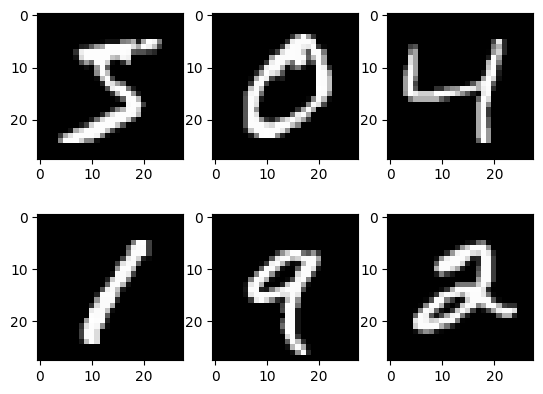

In [9]:
#copy paste
#try to plot image

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
plt.show()

## LEGO

In [14]:
import os
import math
import random
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
# download the data from kaggle: 
# https://www.kaggle.com/ihelon/lego-minifigures-tensorflow-tutorial
# move the folder into your project folder and create a backup of
# the star-wars images at 'lego/star-wars-images/'
BASE_DIR = 'legoo/star-wars-images/'
names = ["YODA", "LUKE SKYWALKER", "R2-D2", "MACE WINDU", "GENERAL GRIEVOUS"]

tf.random.set_seed(1)

In [25]:
# Reorganize the folder structure:
if not os.path.isdir(BASE_DIR + 'train/'):
    for name in names:
        os.makedirs(BASE_DIR + 'train/' + name)
        os.makedirs(BASE_DIR + 'val/' + name)
        os.makedirs(BASE_DIR + 'test/' + name)

In [27]:
# Moce the image files
orig_folders = ["0001/", "0002/", "0003/", "0004/", "0005/"]
for folder_idx, folder in enumerate(orig_folders):
    files = os.listdir(BASE_DIR + folder)
    number_of_images = len([name for name in files])
    n_train = int((number_of_images * 0.6) + 0.5)
    n_valid = int((number_of_images*0.25) + 0.5)
    n_test = number_of_images - n_train - n_valid
    print(number_of_images, n_train, n_valid, n_test)
    for idx, file in enumerate(files):
        file_name = BASE_DIR + folder + file
        if idx < n_train:
            shutil.move(file_name, BASE_DIR + "train/" + names[folder_idx])
        elif idx < n_train + n_valid:
            shutil.move(file_name, BASE_DIR + "val/" + names[folder_idx])
        else:
            shutil.move(file_name, BASE_DIR + "test/" + names[folder_idx])

12 7 3 2
12 7 3 2
12 7 3 2
13 8 3 2
14 8 4 2


In [36]:
# Generate batches of tensor image data with
# optional real-time data augmentation.

# preprocessing_function
# rescale=1./255 -> [0,1]
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
#rotation_range=20,
#horizontal_flip=True,
#width_shift_range=0.2, height_shift_range=0.2,
#shear_range=0.2, zoom_range=0.2)

valid_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_batches = train_gen.flow_from_directory(
    'legoo/star-wars-images/train',
    target_size=(256, 256),
    class_mode='sparse',
    batch_size=4,
    shuffle=True,
    color_mode="rgb",
    classes=names   
)

val_batches = valid_gen.flow_from_directory(
    'legoo/star-wars-images/val',
    target_size=(256, 256),
    class_mode='sparse',
    batch_size=4,
    shuffle=False,
    color_mode="rgb",
    classes=names
)

test_batches = test_gen.flow_from_directory(
    'legoo/star-wars-images/test',
    target_size=(256, 256),
    class_mode='sparse',
    batch_size=4,
    shuffle=False,
    color_mode="rgb",
    classes=names
)

Found 37 images belonging to 5 classes.
Found 16 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


In [37]:
train_batch = train_batches[0]
print(train_batch[0].shape)
print(train_batch[1])
test_batch = test_batches[0]
print(test_batch[0].shape)
print(test_batch[1])

(4, 256, 256, 3)
[0. 3. 1. 2.]
(4, 256, 256, 3)
[0. 0. 1. 1.]


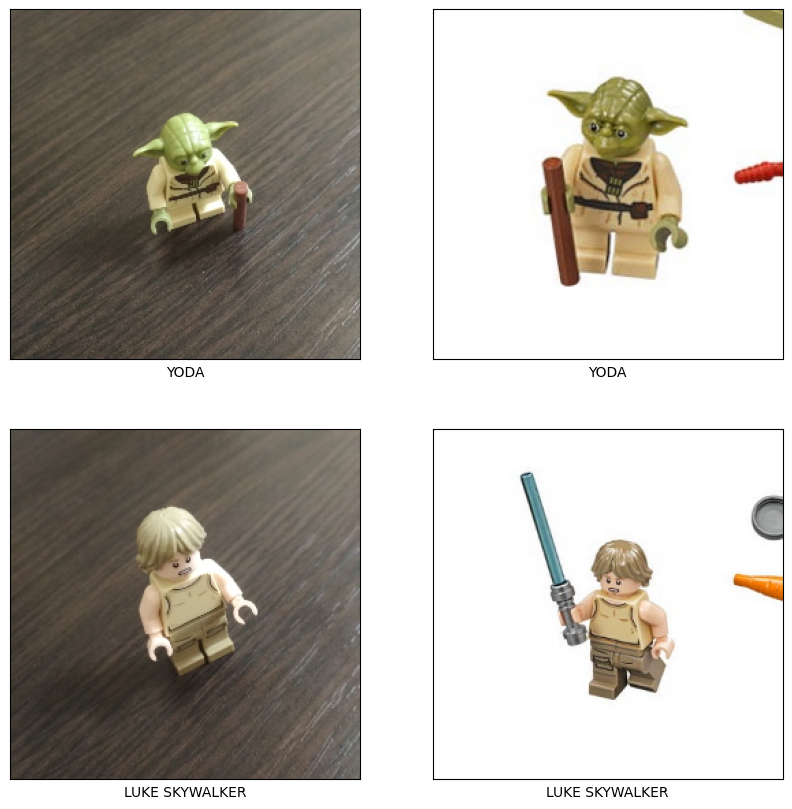

In [38]:
def show(batch, pred_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(batch[0][i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
        lbl = names[int(batch[1][i])]
        if pred_labels is not None:
            lbl += "/ Pred:" + names[int(pred_labels[i])]
        plt.xlabel(lbl)
    plt.show()

show(test_batch)

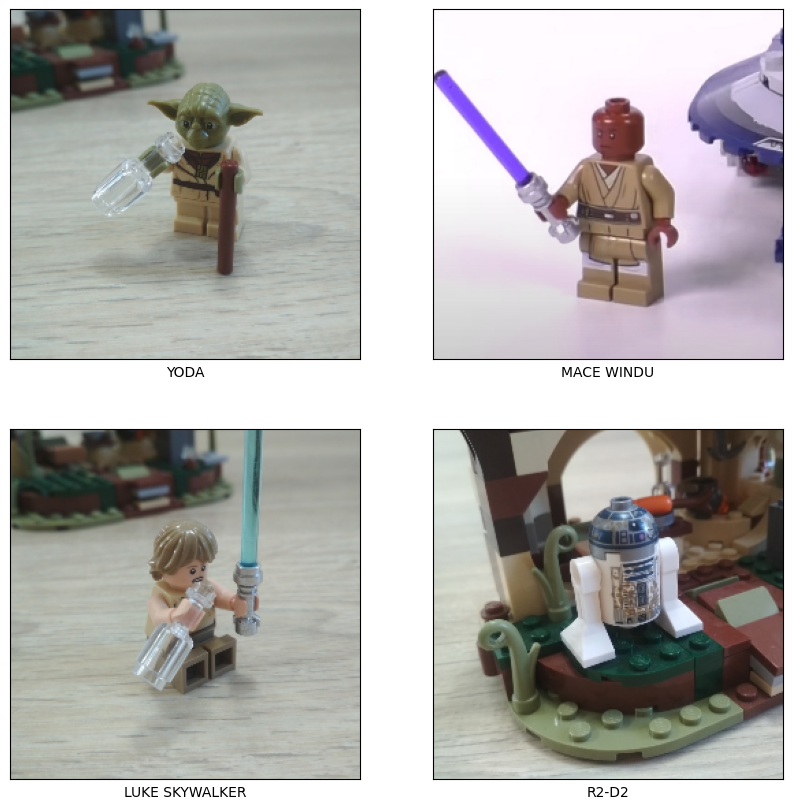

In [39]:
show(train_batch)

In [40]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3,3), strides=(1,1), padding="valid", activation='relu', input_shape=(256, 256,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 64)                1

In [47]:
# loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ["accuracy"]

model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [42]:
# training
epochs = 30

# callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=2
)

history = model.fit(train_batches, validation_data=val_batches,
                    callbacks=[early_stopping],
                      epochs=epochs, verbose=2)

Epoch 1/30
10/10 - 4s - loss: 2.8404 - accuracy: 0.1351 - val_loss: 1.6081 - val_accuracy: 0.1875 - 4s/epoch - 403ms/step
Epoch 2/30
10/10 - 2s - loss: 1.5320 - accuracy: 0.3514 - val_loss: 1.5913 - val_accuracy: 0.1875 - 2s/epoch - 210ms/step
Epoch 3/30
10/10 - 2s - loss: 1.6382 - accuracy: 0.4595 - val_loss: 1.4281 - val_accuracy: 0.2500 - 2s/epoch - 199ms/step
Epoch 4/30
10/10 - 2s - loss: 1.1316 - accuracy: 0.5946 - val_loss: 1.3288 - val_accuracy: 0.5000 - 2s/epoch - 185ms/step
Epoch 5/30
10/10 - 2s - loss: 0.6663 - accuracy: 0.8108 - val_loss: 1.5630 - val_accuracy: 0.3750 - 2s/epoch - 178ms/step
Epoch 6/30
10/10 - 2s - loss: 0.4263 - accuracy: 0.8649 - val_loss: 1.3176 - val_accuracy: 0.6875 - 2s/epoch - 176ms/step
Epoch 7/30
10/10 - 2s - loss: 0.2780 - accuracy: 0.8919 - val_loss: 1.7397 - val_accuracy: 0.5000 - 2s/epoch - 177ms/step
Epoch 8/30
10/10 - 2s - loss: 0.0476 - accuracy: 1.0000 - val_loss: 2.0084 - val_accuracy: 0.5625 - 2s/epoch - 181ms/step
Epoch 9/30
10/10 - 2s - 

In [ ]:
model.save("lego_model.h5")

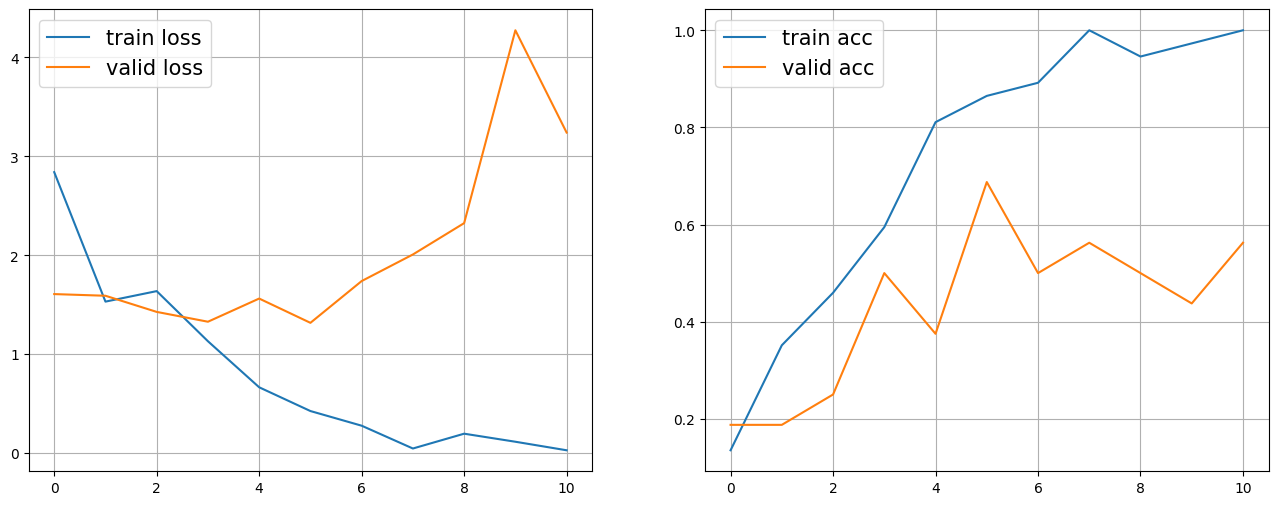

In [43]:
# plot loss and acc
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.grid()
plt.legend(fontsize=15)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='valid acc')
plt.grid()
plt.legend(fontsize=15);

In [44]:
# evaluate on test data
model.evaluate(test_batches, verbose=2)

3/3 - 0s - loss: 0.7532 - accuracy: 0.7000 - 213ms/epoch - 71ms/step


[0.7531704902648926, 0.699999988079071]

In [45]:
# make some predictions
predictions = model.predict(test_batches)
predictions = tf.nn.softmax(predictions)
labels = np.argmax(predictions, axis=1)

print(test_batches[0][1])
print(labels[0:4])

3/3 [==============================] - 0s 30ms/step
[0. 0. 1. 1.]
[0 0 4 0]


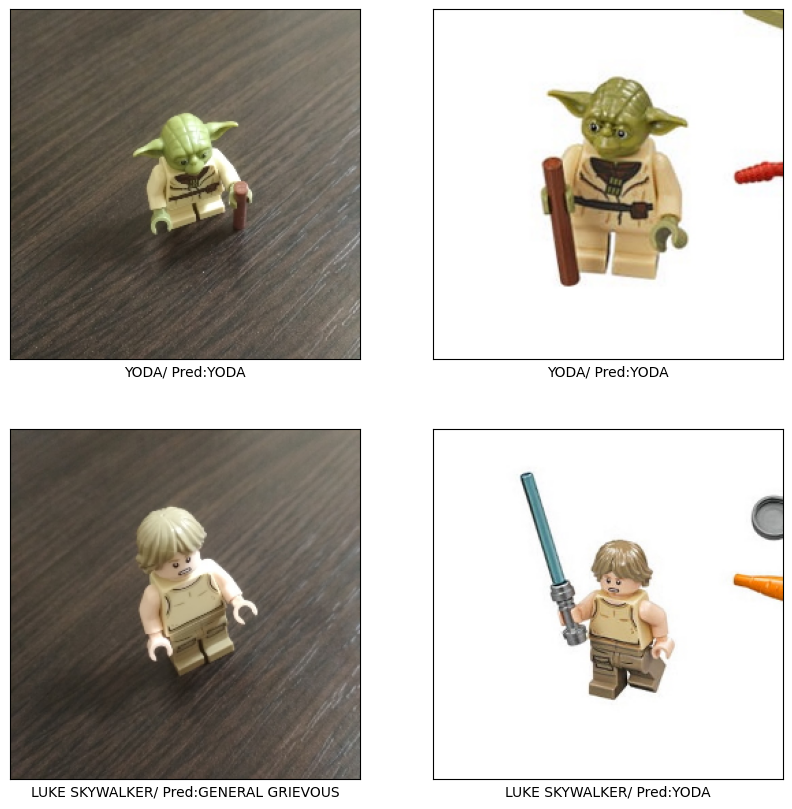

In [46]:
show(test_batches[0], labels[0:4])

## Transfer Learning

In [48]:
vgg_model = tf.keras.applications.vgg16.VGG16()
print(type(vgg_model))
vgg_model.summary()

# try out different ones, e.g. MobileNetV2
#tl_model = tf.keras.applications.MobileNetV2()
#print(type(tl_model))
#tl_model.summary()

553467096/553467096 [==============================] - 42s 0us/step
<class 'keras.src.engine.functional.Functional'>
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
          

In [49]:
# convert to Sequential model, omit the last layer
# this works with VGG16 because the structure is linear
model = keras.models.Sequential()
for layer in vgg_model.layers[0:-1]:
    model.add(layer)

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [51]:
# set trainable=False for all layers
# we don't want to train them again
for layer in model.layers:
    layer.trainable = False
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [52]:
# add a last classification layer for our use case with 5 classes
model.add(layers.Dense(5))

In [54]:
# loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ["accuracy"]

model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [55]:
# get the preprocessing function of this model
preprocess_input = tf.keras.applications.vgg16.preprocess_input

In [56]:
# Generate batches of tensor image data with real-time data augmentation.

train_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
valid_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

train_batches = train_gen.flow_from_directory(
    'legoo/star-wars-images/train',
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=4,
    shuffle=True,
    color_mode="rgb",
    classes=names   
)

val_batches = valid_gen.flow_from_directory(
    'legoo/star-wars-images/val',
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=4,
    shuffle=True,
    color_mode="rgb",
    classes=names
)

test_batches = test_gen.flow_from_directory(
    'legoo/star-wars-images/test',
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=4,
    shuffle=False,
    color_mode="rgb",
    classes=names
)

Found 37 images belonging to 5 classes.
Found 16 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


In [57]:
epochs = 30

early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=2
)

model.fit(train_batches, validation_data=val_batches,
          callbacks=[early_stopping],
          epochs=epochs, verbose=2)

Epoch 1/30
10/10 - 8s - loss: 2.0925 - accuracy: 0.4324 - val_loss: 0.3729 - val_accuracy: 0.8750 - 8s/epoch - 753ms/step
Epoch 2/30
10/10 - 6s - loss: 0.2830 - accuracy: 0.9459 - val_loss: 0.5776 - val_accuracy: 0.8125 - 6s/epoch - 592ms/step
Epoch 3/30
10/10 - 6s - loss: 0.0474 - accuracy: 0.9730 - val_loss: 0.4529 - val_accuracy: 0.8750 - 6s/epoch - 601ms/step
Epoch 4/30
10/10 - 6s - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.4689 - val_accuracy: 0.8125 - 6s/epoch - 615ms/step
Epoch 5/30
10/10 - 6s - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.3135 - val_accuracy: 0.9375 - 6s/epoch - 604ms/step
Epoch 6/30
10/10 - 6s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.2573 - val_accuracy: 0.9375 - 6s/epoch - 601ms/step
Epoch 7/30
10/10 - 6s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.2370 - val_accuracy: 0.9375 - 6s/epoch - 646ms/step
Epoch 8/30
10/10 - 6s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.2279 - val_accuracy: 0.9375 - 6s/epoch - 606ms/step
Epoch 9/30
10/10 - 6s - 

In [58]:
model.evaluate(test_batches, verbose=2)

3/3 - 1s - loss: 0.2940 - accuracy: 0.8000 - 1s/epoch - 443ms/step


[0.2940238118171692, 0.800000011920929]

## modle 2

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [172]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [174]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "new",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 393 files belonging to 3 classes.


In [175]:
class_names = dataset.class_names
class_names

['Alien_Avenger', 'Aplek Knights of Ren', 'Astronaut']

In [176]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[2 1 1 1 1 2 2 2 2 1 0 2 2 1 2 0 0 2 1 2 2 1 1 1 2 0 1 2 1 2 0 1]


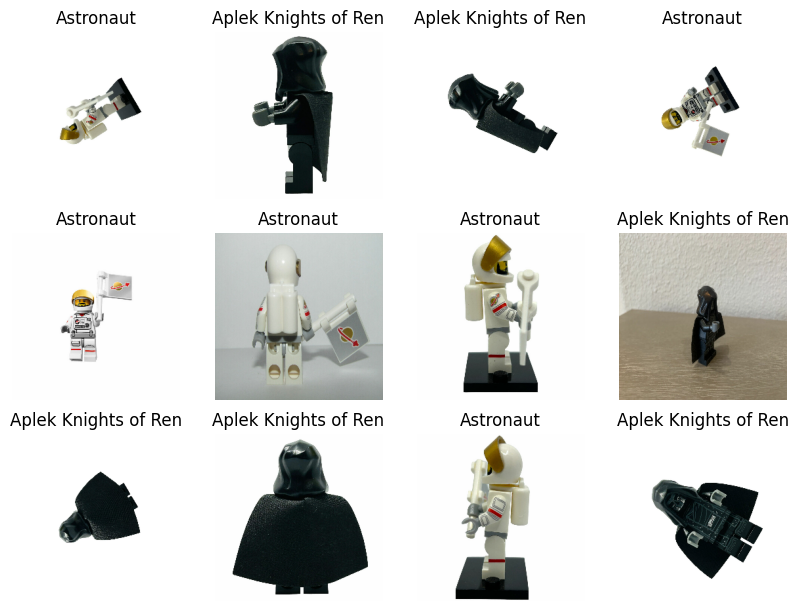

In [177]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [178]:
len(dataset)

13

In [179]:
train_size = 0.8
len(dataset)*train_size

10.4

In [180]:
train_ds = dataset.take(54)
len(train_ds)

13

In [181]:
test_ds = dataset.skip(54)
len(test_ds)

0

In [182]:
val_size=0.1
len(dataset)*val_size

1.3

In [183]:
val_ds = test_ds.take(6)
len(val_ds)

0

In [184]:
test_ds = test_ds.skip(6)
len(test_ds)

0

In [185]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [186]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [187]:
len(train_ds)

10

In [188]:
len(val_ds)

1

In [189]:
len(test_ds)

2

In [190]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [191]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# HERE HAVE TO CHANGE HOW MANY CLASSES YOU HAVE
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 conv2d_24 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (32, 60, 60, 64)        

In [192]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [193]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
10/10 [==============================] - 40s 3s/step - loss: 1.0800 - accuracy: 0.4613 - val_loss: 0.9684 - val_accuracy: 0.7188
Epoch 2/50
10/10 [==============================] - 25s 2s/step - loss: 0.8021 - accuracy: 0.7003 - val_loss: 1.0785 - val_accuracy: 0.5312
Epoch 3/50
10/10 [==============================] - 25s 2s/step - loss: 0.5566 - accuracy: 0.7205 - val_loss: 0.4752 - val_accuracy: 0.7812
Epoch 4/50
10/10 [==============================] - 25s 2s/step - loss: 0.5074 - accuracy: 0.7576 - val_loss: 1.0746 - val_accuracy: 0.5312
Epoch 5/50
10/10 [==============================] - 26s 3s/step - loss: 0.6681 - accuracy: 0.7104 - val_loss: 0.5605 - val_accuracy: 0.7812
Epoch 6/50
10/10 [==============================] - 25s 2s/step - loss: 0.5232 - accuracy: 0.7306 - val_loss: 0.5771 - val_accuracy: 0.6562
Epoch 7/50
10/10 [==============================] - 25s 3s/step - loss: 0.3244 - accuracy: 0.8889 - val_loss: 0.3549 - val_accuracy: 0.8125
Epoch 8/50
10/10 [==

In [194]:
scores = model.evaluate(test_ds)

2/2 [==============================] - 5s 734ms/step - loss: 1.9696e-04 - accuracy: 1.0000


In [195]:
from sklearn.metrics import confusion_matrix, accuracy_score

# ...

# Assuming you have true labels (y_true) and predicted labels (y_pred)
y_true = []
y_pred = []

# Loop through the test dataset to get true and predicted labels
for images, labels in test_ds:
    y_true.extend(labels.numpy())
    predictions = model.predict(images)
    y_pred.extend(tf.argmax(predictions, axis=1).numpy())

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate class-wise accuracy
class_accuracy = {}
for i in range(n_classes):
    true_positive = conf_matrix[i][i] if i < conf_matrix.shape[0] else 0
    total_predicted = sum(conf_matrix[i]) if i < conf_matrix.shape[0] else 0
    
    # Avoid division by zero
    if total_predicted != 0:
        class_accuracy[class_names[i]] = true_positive / total_predicted
    else:
        class_accuracy[class_names[i]] = 0  # Set accuracy to 0 for classes with no predictions

# Print class-wise accuracies
for class_name, accuracy in class_accuracy.items():
    print(f'Class: {class_name}, Accuracy: {accuracy}')

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_true, y_pred)
print(f'Overall Accuracy: {overall_accuracy}')


1/1 [==============================] - 1s 753ms/step
Class: Alien_Avenger, Accuracy: 1.0
Class: Aplek Knights of Ren, Accuracy: 1.0
Class: Astronaut, Accuracy: 1.0
Overall Accuracy: 1.0


In [196]:
scores

[0.00019695500668603927, 1.0]

In [197]:
history

In [158]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 8}

In [159]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [160]:
type(history.history['loss'])

list

In [161]:
len(history.history['loss'])

50

In [162]:
history.history['loss'][:5] # show loss for first 5 epochs

[2.4791581630706787,
 2.42505145072937,
 2.323355197906494,
 2.246572494506836,
 2.2507176399230957]

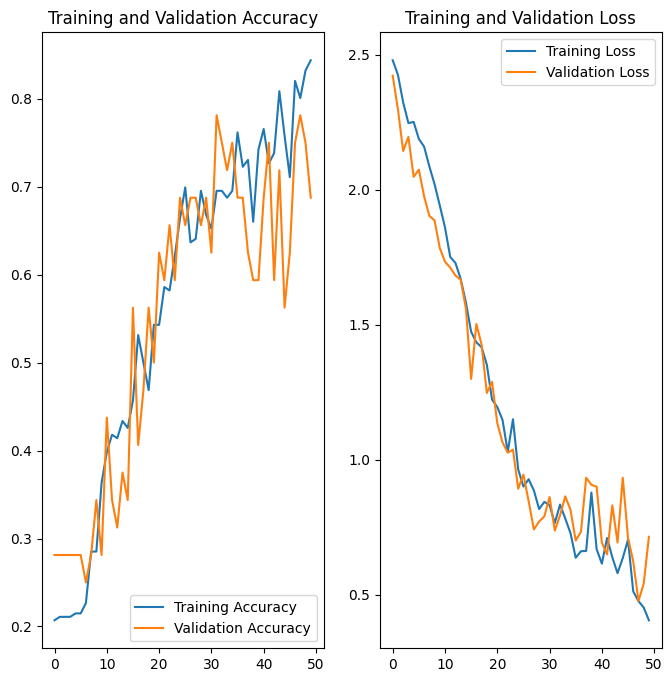

In [163]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Cinderella
1/1 [==============================] - 1s 774ms/step
predicted label: Cinderella


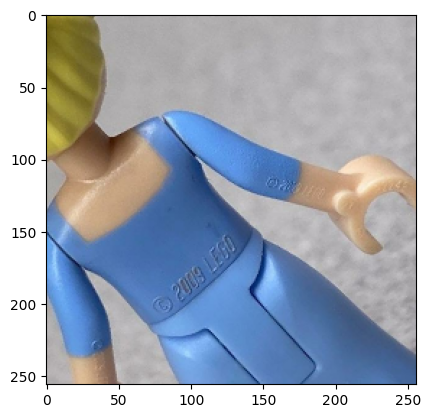

In [164]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

1/1 [==============================] - 0s 106ms/step


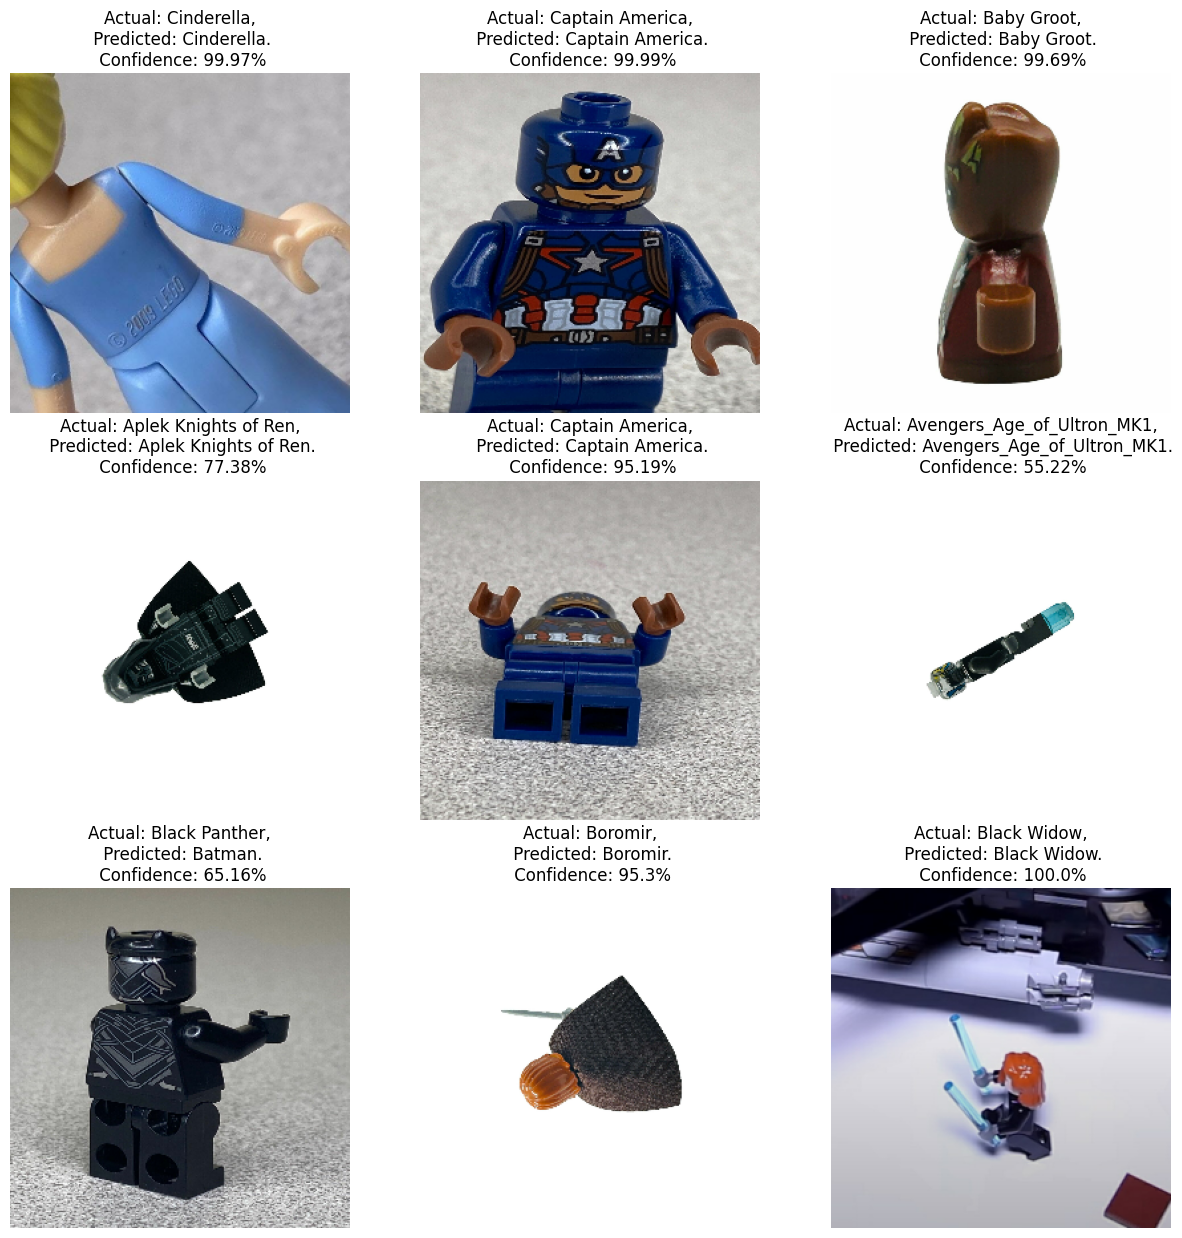

In [165]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")